## Exploratory Data Analysis

    Dataset url: https://archive.ics.uci.edu/ml/datasets/Statlog+(Shuttle)
    Classification problem

In [11]:
import numpy as pd
import pandas as pd

# plot
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Plot info

In [58]:
plt.rcParams['figure.figsize'] = [15, 10]
fontdict = {'fontsize': 18,
           'weight' : 'bold'}

### Read Data

In [32]:
df_train = pd.read_csv('./data/shuttle.trn', delimiter=' ', header=None)
df_train.head()

,0,1,2,3,4,5,6,7,8,9
0,50,21,77,0,28,0,27,48,22,2
1,55,0,92,0,0,26,36,92,56,4
2,53,0,82,0,52,-5,29,30,2,1
3,37,0,76,0,28,18,40,48,8,1
4,37,0,79,0,34,-26,43,46,2,1


In [31]:
df_train.describe()

,0,1,2,3,4,5,6,7,8,9
count,14500.000000,14500.000000,14500.000000,14500.000000,14500.000000,14500.000000,14500.000000,14500.000000,14500.000000,14500.000000
mean,48.203931,0.537586,85.371793,0.250483,34.613103,2.537931,37.145586,50.838621,13.835862,1.677517
std,12.194727,77.401196,8.885516,17.067864,21.530426,304.553283,13.039081,21.282548,25.511220,1.339734
min,27.000000,-3161.000000,40.000000,-362.000000,-46.000000,-26739.000000,-18.000000,-191.000000,-264.000000,1.000000
25%,38.000000,0.000000,79.000000,0.000000,28.000000,-4.000000,32.000000,37.000000,0.000000,1.000000
50%,45.000000,0.000000,83.000000,0.000000,42.000000,0.000000,39.000000,43.000000,2.000000,1.000000
75%,55.000000,0.000000,89.000000,0.000000,46.000000,6.000000,42.000000,60.000000,14.000000,1.000000
max,123.000000,4501.000000,118.000000,1751.000000,310.000000,15164.000000,73.000000,131.000000,126.000000,7.000000


### Distribuição das classes

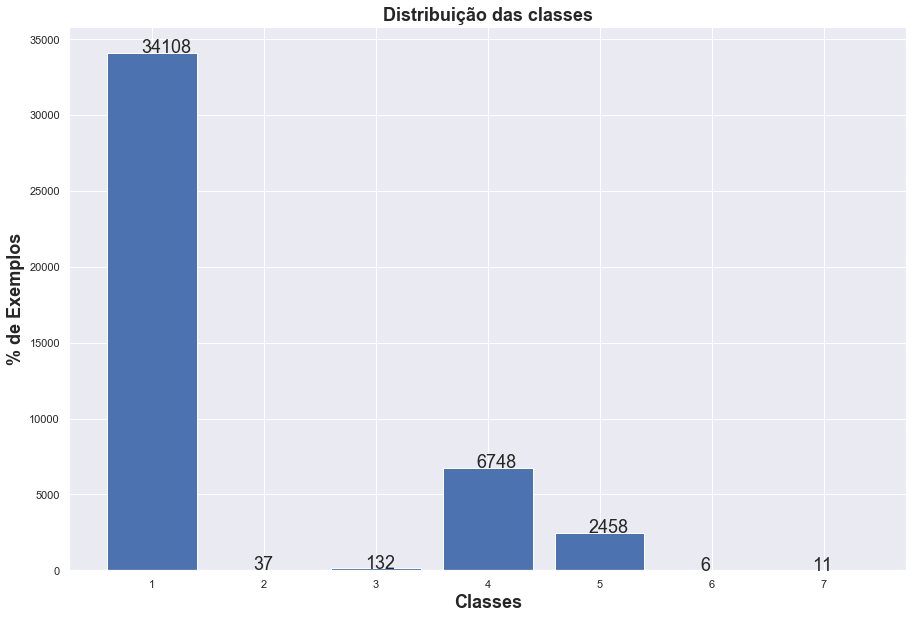

In [88]:
dist = df_train.iloc[:, -1].value_counts()
#plot
plt.bar(dist.index, dist)
# info
plt.title("Distribuição das classes", fontdict=fontdict)
plt.ylabel("% de Exemplos", fontdict=fontdict)
plt.xlabel("Classes", fontdict=fontdict);
# plot values
for i in dist.index:
    plt.text(i - 0.1, dist[i], dist[i], 
              fontsize=18)

    As classes 2, 3, 6 e 7 contem menos de 1% dos casos da base
Consideramos essa base de dados muito desbalanceada e isso deverá ser tratado no preprocessamento

In [83]:
dist[1]

34108